In [1]:
import pandas as pd
import numpy as np

In [2]:
dff = pd.read_csv("weather_data.csv")
dff

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain
5,1/8/2017,NaN,NaN,Sunny
6,1/9/2017,NaN,NaN,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [3]:
print(dff.dtypes)

day             object
temperature    float64
windspeed      float64
event           object
dtype: object


In [4]:
# parse_dates=["day"] converts the "day" column into pandas datetime objects.
# This is important for time-series operations like time interpolation.

df = pd.read_csv("weather_data.csv", parse_dates=["day"])
df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [5]:
print(df.dtypes)

day            datetime64[ns]
temperature           float64
windspeed             float64
event                  object
dtype: object


In [6]:
df = df.set_index("day")
df.head()

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain


In [7]:
df.reset_index(inplace=True)
df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [8]:
df.isna().sum()

,0
day,0
temperature,4
windspeed,4
event,2


# Handling NaN values with fillna

In [9]:
df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [10]:
df_fill_all_zero = df.fillna(0)
df_fill_all_zero

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,0.0,9.0,Sunny
2,2017-01-05,28.0,0.0,Snow
3,2017-01-06,0.0,7.0,0
4,2017-01-07,32.0,0.0,Rain
5,2017-01-08,0.0,0.0,Sunny
6,2017-01-09,0.0,0.0,0
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [11]:
df_fill_dict = df.fillna({
    "temperature": 0,       # numeric fill: sometimes 0, mean, median, etc.
    "windspeed": 1,         # numeric fill
    "event": "No Event"     # categorical fill
})

df_fill_dict

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,0.0,9.0,Sunny
2,2017-01-05,28.0,1.0,Snow
3,2017-01-06,0.0,7.0,No Event
4,2017-01-07,32.0,1.0,Rain
5,2017-01-08,0.0,1.0,Sunny
6,2017-01-09,0.0,1.0,No Event
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [12]:
df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [13]:
# Forward fill (ffill): propagate last valid observation forward top to bottom fill korbe ,
# Good for time series when "last known value still holds".
df_ffill = df.fillna(method="ffill")
df_ffill

/tmp/ipython-input-4091144810.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method="ffill")


,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,32.0,9.0,Sunny
2,2017-01-05,28.0,9.0,Snow
3,2017-01-06,28.0,7.0,Snow
4,2017-01-07,32.0,7.0,Rain
5,2017-01-08,32.0,7.0,Sunny
6,2017-01-09,32.0,7.0,Sunny
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [14]:
df.temperature= pd.Series([5,6,7,3,np.nan,np.nan,1,2])
df

,day,temperature,windspeed,event
0,2017-01-01,5.0,6.0,Rain
1,2017-01-04,6.0,9.0,Sunny
2,2017-01-05,7.0,NaN,Snow
3,2017-01-06,3.0,7.0,NaN
4,2017-01-07,NaN,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,1.0,NaN,NaN
7,2017-01-10,2.0,8.0,Cloudy
8,2017-01-11,NaN,12.0,Sunny


In [15]:
df_ffill = df.fillna(method="ffill",limit=1)
df_ffill

/tmp/ipython-input-1918376039.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method="ffill",limit=1)


,day,temperature,windspeed,event
0,2017-01-01,5.0,6.0,Rain
1,2017-01-04,6.0,9.0,Sunny
2,2017-01-05,7.0,9.0,Snow
3,2017-01-06,3.0,7.0,Snow
4,2017-01-07,3.0,7.0,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,1.0,NaN,Sunny
7,2017-01-10,2.0,8.0,Cloudy
8,2017-01-11,2.0,12.0,Sunny


In [16]:
tf = pd.read_csv("weather_data.csv")
tf.temperature= pd.Series([np.nan,2,4,np.nan,np.nan , 5,6])
tf

,day,temperature,windspeed,event
0,1/1/2017,NaN,6.0,Rain
1,1/4/2017,2.0,9.0,Sunny
2,1/5/2017,4.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,NaN,NaN,Rain
5,1/8/2017,5.0,NaN,Sunny
6,1/9/2017,6.0,NaN,NaN
7,1/10/2017,NaN,8.0,Cloudy
8,1/11/2017,NaN,12.0,Sunny


In [17]:
tff = pd.read_csv("weather_data.csv")
tff.day= pd.Series([np.nan,"1/4/2017","1/5/2017",np.nan,np.nan , "1/8/2017","1/9/2017","1/10/2017"])
tff

,day,temperature,windspeed,event
0,NaN,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,NaN,NaN,7.0,NaN
4,NaN,32.0,NaN,Rain
5,1/8/2017,NaN,NaN,Sunny
6,1/9/2017,NaN,NaN,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,NaN,40.0,12.0,Sunny


In [18]:
# Backward fill (bfill): use next valid observation to fill previous NaNs
# Sometimes used when the next known label/value is assumed to apply earlier.
tff_ffill = tff.fillna(method="bfill")
tff_ffill

/tmp/ipython-input-456086267.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tff_ffill = tff.fillna(method="bfill")


,day,temperature,windspeed,event
0,1/4/2017,32.0,6.0,Rain
1,1/4/2017,28.0,9.0,Sunny
2,1/5/2017,28.0,7.0,Snow
3,1/8/2017,32.0,7.0,Rain
4,1/8/2017,32.0,8.0,Rain
5,1/8/2017,34.0,8.0,Sunny
6,1/9/2017,34.0,8.0,Cloudy
7,1/10/2017,34.0,8.0,Cloudy
8,NaN,40.0,12.0,Sunny


In [19]:
tf_bfill = tf.fillna(method="bfill")
tf_bfill

/tmp/ipython-input-1746297686.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tf_bfill = tf.fillna(method="bfill")


,day,temperature,windspeed,event
0,1/1/2017,2.0,6.0,Rain
1,1/4/2017,2.0,9.0,Sunny
2,1/5/2017,4.0,7.0,Snow
3,1/6/2017,5.0,7.0,Rain
4,1/7/2017,5.0,8.0,Rain
5,1/8/2017,5.0,8.0,Sunny
6,1/9/2017,6.0,8.0,Cloudy
7,1/10/2017,NaN,8.0,Cloudy
8,1/11/2017,NaN,12.0,Sunny


In [20]:
# Backward fill (bfill): use next valid observation to fill previous NaNs
# Sometimes used when the next known label/value is assumed to apply earlier.
df_bfill = df.fillna(method="bfill")
df_bfill

/tmp/ipython-input-1340419091.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method="bfill")


,day,temperature,windspeed,event
0,2017-01-01,5.0,6.0,Rain
1,2017-01-04,6.0,9.0,Sunny
2,2017-01-05,7.0,7.0,Snow
3,2017-01-06,3.0,7.0,Rain
4,2017-01-07,1.0,8.0,Rain
5,2017-01-08,1.0,8.0,Sunny
6,2017-01-09,1.0,8.0,Cloudy
7,2017-01-10,2.0,8.0,Cloudy
8,2017-01-11,NaN,12.0,Sunny


In [21]:
# limit: only fill up to N consecutive NaNs
# Useful to avoid filling long gaps with stale values.
#from collections import counter
#counter(df.temperature)
df_ffill_limit1 = df.fillna(method="ffill", limit=1)

df_ffill_limit1

/tmp/ipython-input-2392905497.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill_limit1 = df.fillna(method="ffill", limit=1)


,day,temperature,windspeed,event
0,2017-01-01,5.0,6.0,Rain
1,2017-01-04,6.0,9.0,Sunny
2,2017-01-05,7.0,9.0,Snow
3,2017-01-06,3.0,7.0,Snow
4,2017-01-07,3.0,7.0,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,1.0,NaN,Sunny
7,2017-01-10,2.0,8.0,Cloudy
8,2017-01-11,2.0,12.0,Sunny


# Handling missing values with interpolate and dropna

In [22]:
df

,day,temperature,windspeed,event
0,2017-01-01,5.0,6.0,Rain
1,2017-01-04,6.0,9.0,Sunny
2,2017-01-05,7.0,NaN,Snow
3,2017-01-06,3.0,7.0,NaN
4,2017-01-07,NaN,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,1.0,NaN,NaN
7,2017-01-10,2.0,8.0,Cloudy
8,2017-01-11,NaN,12.0,Sunny


In [25]:
#Time interpolation uses the DatetimeIndex
# It accounts for actual time gaps between observations.
# Only works properly if your index is datetime.

df_day = df.set_index('day')
df_interp_time = df_day.interpolate(method="time")

df_interp_time

/tmp/ipython-input-841381068.py:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interp_time = df_day.interpolate(method="time")


,temperature,windspeed,event
day,,,
2017-01-01,5.000000,6.00,Rain
2017-01-04,6.000000,9.00,Sunny
2017-01-05,7.000000,8.00,Snow
2017-01-06,3.000000,7.00,NaN
2017-01-07,2.333333,7.25,Rain
2017-01-08,1.666667,7.50,Sunny
2017-01-09,1.000000,7.75,NaN
2017-01-10,2.000000,8.00,Cloudy
2017-01-11,2.000000,12.00,Sunny


In [26]:
df

,day,temperature,windspeed,event
0,2017-01-01,5.0,6.0,Rain
1,2017-01-04,6.0,9.0,Sunny
2,2017-01-05,7.0,NaN,Snow
3,2017-01-06,3.0,7.0,NaN
4,2017-01-07,NaN,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,1.0,NaN,NaN
7,2017-01-10,2.0,8.0,Cloudy
8,2017-01-11,NaN,12.0,Sunny


In [27]:
#drop rows that contain ANY missing value
# This can shrink your dataset quickly (bad if many NaNs). --- onek boro dataset , 1000 row er moddhe ekta row nan ache , full row drop kore

df_drop_any = df.dropna()

print(df_drop_any)
print("Remaining rows:", len(df_drop_any))

         day  temperature  windspeed   event
0 2017-01-01          5.0        6.0    Rain
1 2017-01-04          6.0        9.0   Sunny
7 2017-01-10          2.0        8.0  Cloudy
Remaining rows: 3


In [28]:
#drop rows only if ALL values are missing in that row
# This is less aggressive.
#1000 row er moddhe 1000 tai jodi null value thak e, tahlei drp korbo

df_drop_all = df.dropna(how="all")

print(df_drop_all)
print("Remaining rows:", len(df_drop_all))

         day  temperature  windspeed   event
0 2017-01-01          5.0        6.0    Rain
1 2017-01-04          6.0        9.0   Sunny
2 2017-01-05          7.0        NaN    Snow
3 2017-01-06          3.0        7.0     NaN
4 2017-01-07          NaN        NaN    Rain
5 2017-01-08          NaN        NaN   Sunny
6 2017-01-09          1.0        NaN     NaN
7 2017-01-10          2.0        8.0  Cloudy
8 2017-01-11          NaN       12.0   Sunny
Remaining rows: 9


In [32]:
df


,day,temperature,windspeed,event
0,2017-01-01,5.0,6.0,Rain
1,2017-01-04,6.0,9.0,Sunny
2,2017-01-05,7.0,NaN,Snow
3,2017-01-06,3.0,7.0,NaN
4,2017-01-07,NaN,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,1.0,NaN,NaN
7,2017-01-10,2.0,8.0,Cloudy
8,2017-01-11,NaN,12.0,Sunny


In [35]:
#thresh: keep rows with at least K non-NaN values
# Example: thresh=2 means at least 2 columns must be non-missing.
#1000 ermoddhe 700 value thaka thakbe , or minimu 800 ta non missing value hoite hbe , ei 800 ta value threshold
df_drop_thresh2 = df.dropna(thresh=3)

print(df_drop_thresh2)
print("Remaining rows:", len(df_drop_thresh2))

         day  temperature  windspeed   event
0 2017-01-01          5.0        6.0    Rain
1 2017-01-04          6.0        9.0   Sunny
2 2017-01-05          7.0        NaN    Snow
3 2017-01-06          3.0        7.0     NaN
7 2017-01-10          2.0        8.0  Cloudy
8 2017-01-11          NaN       12.0   Sunny
Remaining rows: 6


# Handling Missing Data - replace method

In [36]:
#nan value ke kono ekta garbage value thakt par e, oigula ke replace korbo
of = pd.read_csv("weather_data2.csv")

print(of)
print(of.dtypes)


        day  temperature  windspeed  event
0  1/1/2017           32          6   Rain
1  1/2/2017       -99999          7  Sunny
2  1/3/2017           28     -99999   Snow
3  1/4/2017       -99999          7      0
4  1/5/2017           32     -99999   Rain
5  1/6/2017           31          2  Sunny
6  1/6/2017           34          5      0
day            object
temperature     int64
windspeed       int64
event          object
dtype: object


In [37]:
# Many datasets use -99999 to mean "missing" (but pandas won't treat it as missing automatically).
# Replace that sentinel with actual NaN so pandas missing-data tools can work.
#ordinary datar baire data -> extra ordinary data , ei data gula ke amra outlayer data bolbo

df_1 = of.replace(-99999, np.nan)

df_1

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,0
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,0


In [38]:
# Sometimes a dataset uses multiple sentinel codes: -99999, -88888, etc.
# Here we replace both with 0 (or could be NaN depending on meaning).


# - Replacing to 0 is only OK if 0 is a meaningful real value.
# - If it means "unknown", replace with np.nan and later impute properly.

df_2 = of.replace(to_replace=[-99999, -88888], value=0)

df_2

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,0,7,Sunny
2,1/3/2017,28,0,Snow
3,1/4/2017,0,7,0
4,1/5/2017,32,0,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


In [39]:
# Sometimes sentinel values differ by column OR you only want to clean specific columns.
# This syntax says:
#   - in 'temperature' column replace -99999 with NaN
#   - in 'windspeed'   column replace -99999 with NaN
#   - in 'event'       column replace string '0' with NaN (meaning "no event recorded")

df_3 = of.replace({
    "temperature": -99999,
    "windspeed": -99999,
    "event": "0"
}, np.nan)


df_3

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,NaN
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,NaN


In [41]:
# This style is global: anywhere in the dataframe,
# replace -99999 -> NaN and "no event" -> "Sunny"
# (In the original notebook they show mapping style usage.)

# Be careful with global mapping: if "-99999" appears in a column where it is a valid value,
# it will still be replaced. Per-column mapping is safer.

df_4 = of.replace({
    -99999: np.nan,
    "no event": "Sunny"
})


print(df_4)

        day  temperature  windspeed  event
0  1/1/2017         32.0        6.0   Rain
1  1/2/2017          NaN        7.0  Sunny
2  1/3/2017         28.0        NaN   Snow
3  1/4/2017          NaN        7.0      0
4  1/5/2017         32.0        NaN   Rain
5  1/6/2017         31.0        2.0  Sunny
6  1/6/2017         34.0        5.0      0


In [42]:
# Regex replacement: cleaning units like 'F' and 'mph'

# In the dataset, temperature and windspeed may include units in strings like:
# "32 F", "28 c", "6 mph", "7 mph"
#
# We can remove alphabet characters using regex.
# Example pattern: '[A-Za-z]' means "any letter (A-Z or a-z)".
#

df_5 = of.replace(
    {"temperature": r"[A-Za-z]", "windspeed": r"[A-Za-z]"},
    "",
    regex=True   #
)


print(df_5)

# N.B:
# After removing letters, the columns may still be strings like "32  " or " 6  ".
# We should strip spaces and convert to numeric for ML models.

df_5["temperature"] = pd.to_numeric(df_5["temperature"].astype(str).str.strip(), errors="coerce")  # type casting hocche
df_5["windspeed"]   = pd.to_numeric(df_5["windspeed"].astype(str).str.strip(), errors="coerce")


print(df_5)
print(df_5.dtypes)

# N.B:
# errors="coerce" means: anything still not parseable becomes NaN.
# This is useful when cleaning messy real-world data.


        day  temperature  windspeed  event
0  1/1/2017           32          6   Rain
1  1/2/2017       -99999          7  Sunny
2  1/3/2017           28     -99999   Snow
3  1/4/2017       -99999          7      0
4  1/5/2017           32     -99999   Rain
5  1/6/2017           31          2  Sunny
6  1/6/2017           34          5      0
        day  temperature  windspeed  event
0  1/1/2017           32          6   Rain
1  1/2/2017       -99999          7  Sunny
2  1/3/2017           28     -99999   Snow
3  1/4/2017       -99999          7      0
4  1/5/2017           32     -99999   Rain
5  1/6/2017           31          2  Sunny
6  1/6/2017           34          5      0
day            object
temperature     int64
windspeed       int64
event          object
dtype: object


In [43]:
# Replace a list with another list (category -> numeric score)

# This is a common ML step: convert ordinal categories into ordered numbers.
# Example: score labels -> numeric ratings.

grades = pd.DataFrame({
    "score": ["exceptional", "average", "good", "poor", "average", "exceptional"],
    "student": ["rob", "maya", "parthiv", "tom", "julian", "erica"]
})

print("\n=== Grades dataframe ===")
print(grades)

# Replace multiple categories using list-to-list mapping.
# RULE: the two lists must have the SAME length.

grades_num = grades.replace(
    ["poor", "average", "good", "exceptional"],
    [1, 2, 3, 4]
)


print(grades_num)

# ML note:
# This makes sense ONLY if the categories are truly ordinal (poor < average < good < exceptional).
# If categories are nominal (e.g., city names), use one-hot encoding instead.


=== Grades dataframe ===
         score  student
0  exceptional      rob
1      average     maya
2         good  parthiv
3         poor      tom
4      average   julian
5  exceptional    erica
   score  student
0      4      rob
1      2     maya
2      3  parthiv
3      1      tom
4      2   julian
5      4    erica


/tmp/ipython-input-2607483909.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  grades_num = grades.replace(


# Concat and Merge

In [44]:
X_train = pd.DataFrame({
    "id": [1, 2, 3, 4],
    "age": [23, 45, 31, 35],
    "bp":  [120, 140, 130, 128]
})

X_test = pd.DataFrame({
    "id": [5, 6],
    "age": [29, 50],
    "bp":  [125, 150]
})

y_train = pd.DataFrame({
    "id": [1, 2, 3, 4],
    "target": [0, 1, 0, 1]
})

print("X_train:\n", X_train, "\n")
print("X_test:\n", X_test, "\n")
print("y_train:\n", y_train, "\n")

X_train:
    id  age   bp
0   1   23  120
1   2   45  140
2   3   31  130
3   4   35  128 

X_test:
    id  age   bp
0   5   29  125
1   6   50  150 

y_train:
    id  target
0   1       0
1   2       1
2   3       0
3   4       1 



In [46]:
#concat vertically (axis=0): stack rows
#     ML use: combine train + test features into one table for uniform preprocessing

X_all = pd.concat([X_train, X_test], axis=0)
print("A1) Vertical concat (default axis=0) -> indices are kept:\n", X_all, "\n")

# Important: indices repeat (0..), which can be annoying later.
X_all_reset = pd.concat([X_train, X_test], axis=0, ignore_index=True)
print("A1) Vertical concat + ignore_index=True -> clean 0..n-1 index:\n", X_all_reset, "\n")
# ignore_index=True makes the concatenation axis re-labeled 0..n-1  [oai_citation:4‡pandas.pyda

A1) Vertical concat (default axis=0) -> indices are kept:
    id  age   bp
0   1   23  120
1   2   45  140
2   3   31  130
3   4   35  128
0   5   29  125
1   6   50  150 

A1) Vertical concat + ignore_index=True -> clean 0..n-1 index:
    id  age   bp
0   1   23  120
1   2   45  140
2   3   31  130
3   4   35  128
4   5   29  125
5   6   50  150 



In [47]:
#   concat with keys: keep origin label (train/test)
#     ML use: track where rows came from while still processing together

X_all_keyed = pd.concat([X_train, X_test], keys=["train", "test"])
print("A2) Vertical concat + keys=['train','test'] -> hierarchical index:\n", X_all_keyed, "\n")

# Access the "train" block easily:
print("A2) Only train slice:\n", X_all_keyed.loc["train"], "\n")

A2) Vertical concat + keys=['train','test'] -> hierarchical index:
          id  age   bp
train 0   1   23  120
      1   2   45  140
      2   3   31  130
      3   4   35  128
test  0   5   29  125
      1   6   50  150 

A2) Only train slice:
    id  age   bp
0   1   23  120
1   2   45  140
2   3   31  130
3   4   35  128 



In [48]:
#     concat horizontally (axis=1): stack columns side-by-side
#     ML use: combine different feature blocks (e.g., numeric features + embeddings)

# Let's make a second feature block (e.g., derived features)
X_train_extra = pd.DataFrame({
    "bmi": [22.1, 30.5, 25.0, 27.3],
    "chol": [180, 220, 195, 205]
})

# If you do axis=1 concat without aligning indices carefully, it aligns on index.
X_train_wide = pd.concat([X_train, X_train_extra], axis=1)
print("A3) Horizontal concat (axis=1) -> columns added by index alignment:\n", X_train_wide, "\n")


A3) Horizontal concat (axis=1) -> columns added by index alignment:
    id  age   bp   bmi  chol
0   1   23  120  22.1   180
1   2   45  140  30.5   220
2   3   31  130  25.0   195
3   4   35  128  27.3   205 



In [50]:
# Common pitfall: axis=1 concat with mismatched order
#     Fix by setting index to a key before concat, or use merge on the key.

# Shuffle rows to simulate a common real-world issue (different order)
X_train_extra_shuffled = X_train_extra.sample(frac=1, random_state=0).reset_index(drop=True)
print("A4) Shuffled extra features:\n", X_train_extra_shuffled, "\n")

# Bad: axis=1 concat aligns by row index, NOT by "id"
bad_wide = pd.concat([X_train, X_train_extra_shuffled], axis=1)
print("A4) BAD horizontal concat (wrong pairing if row order differs):\n", bad_wide, "\n")

# Good approach 1: set a shared index first (id) then concat axis=1
X_train_idx = X_train.set_index("id")
X_train_extra_idx = X_train_extra.assign(id=X_train["id"]).set_index("id")  # align by id explicitly
good_wide = pd.concat([X_train_idx, X_train_extra_idx], axis=1)
print("A4) GOOD: set index to 'id' then concat axis=1:\n", good_wide, "\n")


A4) Shuffled extra features:
     bmi  chol
0  25.0   195
1  27.3   205
2  30.5   220
3  22.1   180 

A4) BAD horizontal concat (wrong pairing if row order differs):
    id  age   bp   bmi  chol
0   1   23  120  25.0   195
1   2   45  140  27.3   205
2   3   31  130  30.5   220
3   4   35  128  22.1   180 

A4) GOOD: set index to 'id' then concat axis=1:
     age   bp   bmi  chol
id                      
1    23  120  22.1   180
2    45  140  30.5   220
3    31  130  25.0   195
4    35  128  27.3   205 



(np.float64(-0.5), np.float64(1279.5), np.float64(719.5), np.float64(-0.5))

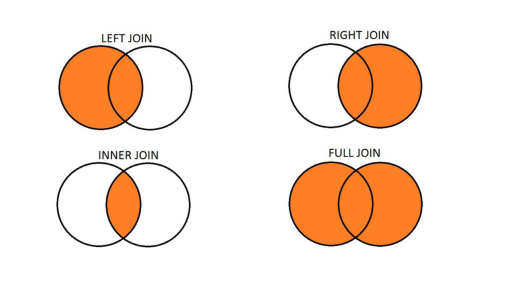

In [51]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('db_joins.jpg')  # image name দাও
plt.imshow(img)
plt.axis('off')


In [52]:
X_train

,id,age,bp
0,1,23,120
1,2,45,140
2,3,31,130
3,4,35,128


In [53]:
y_train

,id,target
0,1,0
1,2,1
2,3,0
3,4,1


In [54]:
#  Basic merge: add label y to features X using 'id'
#     ML use: build training table (X + y) for modeling

train_table = X_train.merge(y_train, on="id", how="inner")
print("B1) X_train merged with y_train on id (inner join):\n", train_table, "\n")

B1) X_train merged with y_train on id (inner join):
    id  age   bp  target
0   1   23  120       0
1   2   45  140       1
2   3   31  130       0
3   4   35  128       1 



In [55]:
# Join types: inner / left / right / outer
#     ML use: outer helps diagnose missing matches; left preserves all feature rows, etc.
# ------------------------------------------------------------

# Make y missing for one id to demonstrate behavior
y_train_missing = pd.DataFrame({"id": [1, 2, 4], "target": [0, 1, 1]})

inner = X_train.merge(y_train_missing, on="id", how="inner")
left  = X_train.merge(y_train_missing, on="id", how="left")
outer = X_train.merge(y_train_missing, on="id", how="outer", indicator=True)

print("B2) INNER (keeps only matching ids):\n", inner, "\n")
print("B2) LEFT  (keeps all X_train ids, target becomes NaN if missing):\n", left, "\n")
print("B2) OUTER + indicator=True (shows row origin via _merge):\n", outer, "\n")
# indicator=True adds a column telling whether row came from left/right/both  [oai_citation:6‡pandas.pydata.org](https://pandas.pydata.org/docs/reference/api/pandas.merge.html?utm_source=chatgpt.com)


B2) INNER (keeps only matching ids):
    id  age   bp  target
0   1   23  120       0
1   2   45  140       1
2   4   35  128       1 

B2) LEFT  (keeps all X_train ids, target becomes NaN if missing):
    id  age   bp  target
0   1   23  120     0.0
1   2   45  140     1.0
2   3   31  130     NaN
3   4   35  128     1.0 

B2) OUTER + indicator=True (shows row origin via _merge):
    id  age   bp  target     _merge
0   1   23  120     0.0       both
1   2   45  140     1.0       both
2   3   31  130     NaN  left_only
3   4   35  128     1.0       both 



In [56]:
#   Overlapping column names -> suffixes
#     ML use: merging feature tables from different sources may have same column name (e.g., "age")

df_a = pd.DataFrame({"id": [1, 2, 3], "age": [23, 45, 31]})
df_b = pd.DataFrame({"id": [1, 2, 3], "age": [24, 46, 30]})  # "age" overlaps but means something else

merged_suffix = df_a.merge(df_b, on="id", suffixes=("_clinicA", "_clinicB"))
print("B3) Overlapping columns resolved with suffixes:\n", merged_suffix, "\n")
# merge uses suffixes like _x/_y by default to disambiguate overlaps  [oai_citation:7‡pandas.pydata.org](https://pandas.pydata.org/docs/reference/api/pandas.merge.html?utm_source=chatgpt.com)


B3) Overlapping columns resolved with suffixes:
    id  age_clinicA  age_clinicB
0   1           23           24
1   2           45           46
2   3           31           30 



In [57]:
 X_train

,id,age,bp
0,1,23,120
1,2,45,140
2,3,31,130
3,4,35,128


In [58]:
#    Merge with different key names: left_on / right_on
#     ML use: joining tables that label IDs differently ("patient_id" vs "id")

visits = pd.DataFrame({"patient_id": [1, 2, 2, 4], "visit_count": [3, 1, 2, 5]})

joined = X_train.merge(visits, left_on="id", right_on="patient_id", how="left")
print("B4) Merge on different key names (left_on/right_on):\n", joined, "\n")


B4) Merge on different key names (left_on/right_on):
    id  age   bp  patient_id  visit_count
0   1   23  120         1.0          3.0
1   2   45  140         2.0          1.0
2   2   45  140         2.0          2.0
3   3   31  130         NaN          NaN
4   4   35  128         4.0          5.0 



In [59]:
#    Merge with different key names: left_on / right_on
#     ML use: joining tables that label IDs differently ("patient_id" vs "id")

visits = pd.DataFrame({"patient_id": [1, 2, 2, 4], "visit_count": [3, 1, 2, 5]})

joined = X_train.merge(visits, left_on="id", right_on="patient_id", how="right")
print("B4) Merge on different key names (left_on/right_on):\n", joined, "\n")


B4) Merge on different key names (left_on/right_on):
    id  age   bp  patient_id  visit_count
0   1   23  120           1            3
1   2   45  140           2            1
2   2   45  140           2            2
3   4   35  128           4            5 



In [60]:
#    Merge with different key names: left_on / right_on
#     ML use: joining tables that label IDs differently ("patient_id" vs "id")

visits = pd.DataFrame({"patient_id": [1, 2, 2, 4], "visit_count": [3, 1, 2, 5]})

joined = X_train.merge(visits, left_on="id", right_on="patient_id", how="inner")
print("B4) Merge on different key names (left_on/right_on):\n", joined, "\n")


B4) Merge on different key names (left_on/right_on):
    id  age   bp  patient_id  visit_count
0   1   23  120           1            3
1   2   45  140           2            1
2   2   45  140           2            2
3   4   35  128           4            5 



In [61]:
#    Merge with different key names: left_on / right_on
#     ML use: joining tables that label IDs differently ("patient_id" vs "id")

visits = pd.DataFrame({"patient_id": [1, 2, 2, 4], "visit_count": [3, 1, 2, 5]})

joined = X_train.merge(visits, left_on="id", right_on="patient_id", how="outer")
print("B4) Merge on different key names (left_on/right_on):\n", joined, "\n")


B4) Merge on different key names (left_on/right_on):
    id  age   bp  patient_id  visit_count
0   1   23  120         1.0          3.0
1   2   45  140         2.0          1.0
2   2   45  140         2.0          2.0
3   3   31  130         NaN          NaN
4   4   35  128         4.0          5.0 



In [63]:
df

,day,temperature,windspeed,event
0,2017-01-01,5.0,6.0,Rain
1,2017-01-04,6.0,9.0,Sunny
2,2017-01-05,7.0,NaN,Snow
3,2017-01-06,3.0,7.0,NaN
4,2017-01-07,NaN,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,1.0,NaN,NaN
7,2017-01-10,2.0,8.0,Cloudy
8,2017-01-11,NaN,12.0,Sunny


In [62]:
from collections import Counter

Counter(df.temperature)

Counter({5.0: 1,
         6.0: 1,
         7.0: 1,
         3.0: 1,
         nan: 1,
         nan: 1,
         1.0: 1,
         2.0: 1,
         nan: 1})

In [ ]:
#Counter({3.0: 2, nan: 1, 6.0: 1, 7.0: 1, nan: 1, nan: 1, 1.0: 1, 2.0: 1})